<a href="http://landlab.github.io"><img style="float: left" src="../../landlab_header.png"></a>

For more Landlab tutorials, click here: https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html

**Application of the flow__distance utility on a Sicilian basin**

This notebook illustrates how to run the flow**__**distance utility on a digital elevation model (DEM) that represents a real basin in Sicily. First, a watershed will be extracted from the input DEM by using the watershed utility. Then, the distances from each node to the watershed's outlet will be obtained with the flow**__**distance utility. Flow is routed using the D8 algorithm.

First, import what we'll need:

In [1]:
from landlab.io import read_esri_ascii
from landlab.components import FlowAccumulator
from landlab.plot import imshow_grid
from matplotlib.pyplot import figure
%matplotlib inline
from landlab.utils import watershed
import numpy as np
from landlab.utils.flow__distance import calculate_flow__distance

Import a square DEM that includes the watershed:

In [2]:
(mg, z) = read_esri_ascii('nocella_resampled.txt',
                          name='topographic__elevation')

Run the FlowAccumulator and the DepressionFinderAndRouter components to find depressions, to route the flow across them and to calculate flow direction and drainage area:

In [3]:
fr = FlowAccumulator(mg,
                     flow_director='D8',
                     depression_finder='DepressionFinderAndRouter')
fr.run_one_step()

Set the id of the outlet. The value indicated here is the node id of the entire watershed's outlet:

In [4]:
outlet_id = 15324

Run the watershed utility and show the watershed mask:

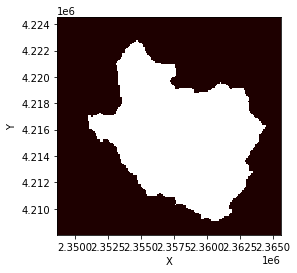

In [5]:
ws_mask = watershed.get_watershed_mask(mg, outlet_id)
figure()
imshow_grid(mg, ws_mask, allow_colorbar=False)

Run the flow**__**distance utility:

In [6]:
flow__distance = calculate_flow__distance(mg, add_to_grid=True, clobber=True)

Mask the flow**__**distance to the watershed mask. This operation has to be done because the flow**__**distance utility is applied to the entire grid that contains other streams not connected with our stream network and, for this reason, not belonging to our watershed.

In [7]:
flow_distance = np.zeros(mg.number_of_nodes)
flow_distance[ws_mask] = flow__distance[ws_mask] - flow__distance[outlet_id]

Add the flow**__**distance field to the grid and show the spatial distribution of the distances from each node to the watershed's outlet:

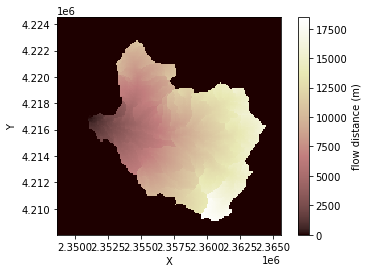

In [8]:
mg.add_field('flow_distance', flow_distance, at='node', clobber=True)
figure()
imshow_grid(mg,
            mg.at_node['flow_distance'],
            colorbar_label='flow distance (m)')